In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
dataframe = pd.read_csv("csv/82000278_Toamnei_CO2_2021_7_SHORT.csv")
dataframe.head()

,time,latitude,longitude,altitude,co2
0,1625086823,45.651464,25.615426,100,553
1,1625086883,45.651464,25.615426,100,551
2,1625086943,45.651464,25.615426,100,551
3,1625087003,45.651464,25.615426,100,558
4,1625087063,45.651464,25.615426,100,559


In [31]:
dataframe_size = len(dataframe.index)
dataframe_size

10499

In [32]:
X = dataframe['time'].values
y = dataframe['co2'].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10) #10%

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=True, max_depth=55, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=600)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\Valentin.Adam\AppData\Local\Temp\ipykernel_16132\1755838295.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(max_depth=55, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=6, n_estimators=600)

In [35]:
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([477.46842379, 653.69821108, 570.61840203, ..., 606.2704837 ,
       449.71173838, 633.42552735])

In [36]:
dataframe_predictions = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
dataframe_predictions

,Real Values,Predicted Values
0,477,477.468424
1,664,653.698211
2,571,570.618402
3,637,637.247593
4,602,597.442063
...,...,...
1045,459,460.784427
1046,679,680.182490
1047,605,606.270484
1048,461,449.711738


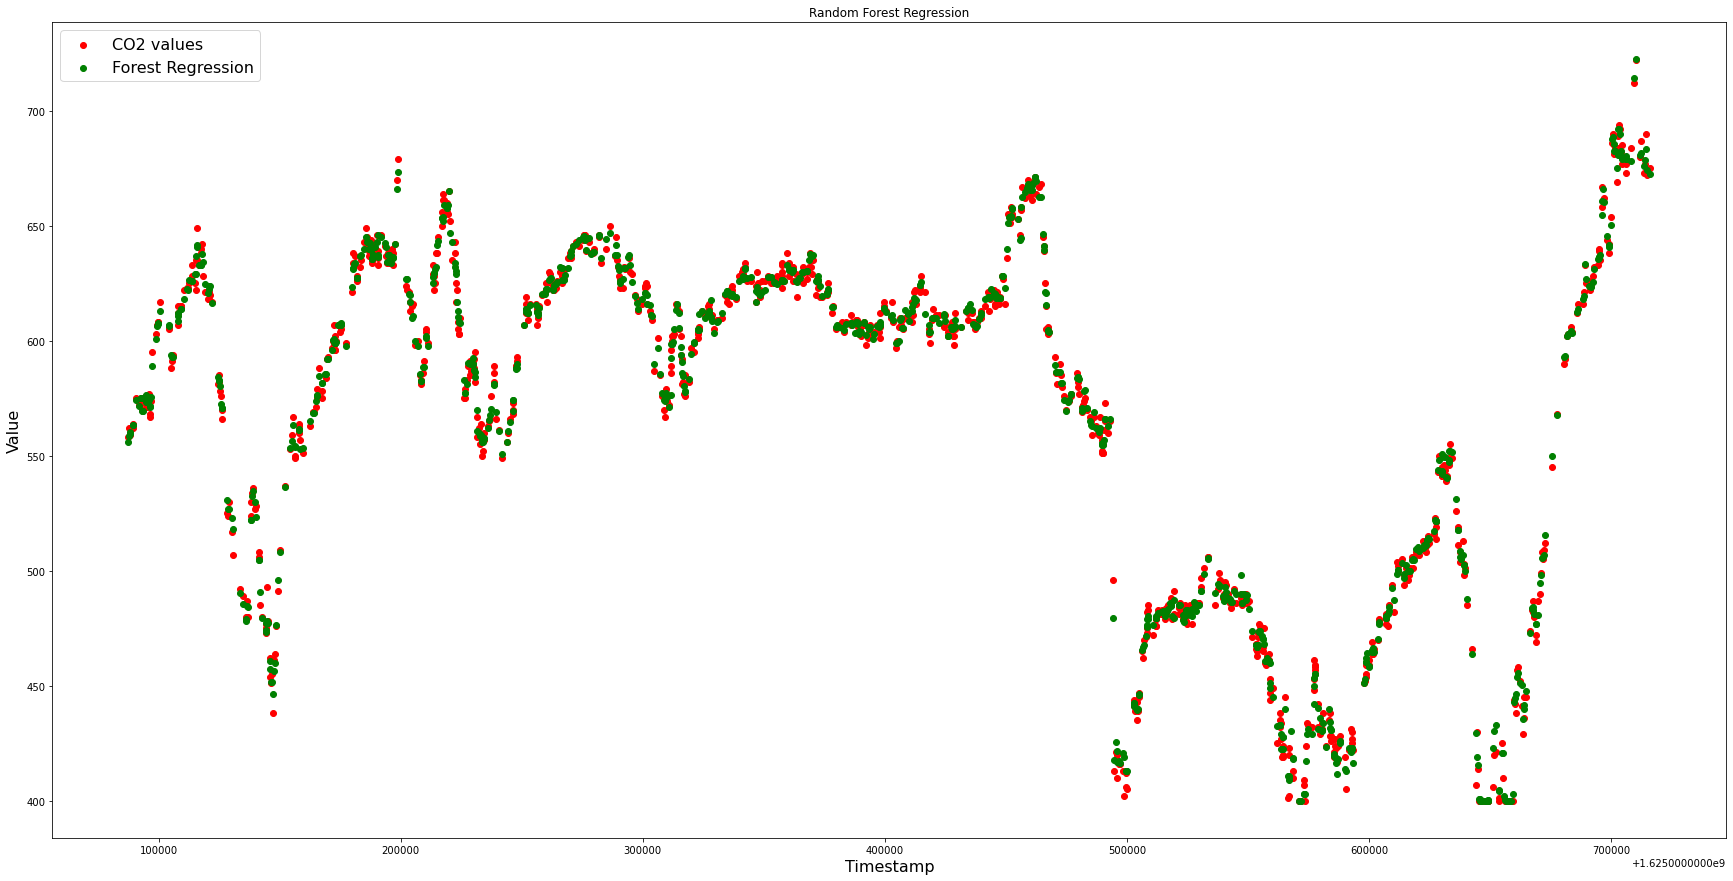

In [39]:
# # Visualising the Random Forest Regression Results  
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(30,15))
# plt.scatter(X_test, y_test, color = 'red', label = "CO2 values")
# plt.scatter(X_test, y_pred, color = 'green', label = "Forest Regression")

# plt.plot(X_grid, regressor.predict(X_grid), color = 'black')

# plt.plot(X_train, y_train, color = 'red')
# plt.plot(X_test, y_test, color = 'green')
# plt.plot(X_test, y_pred, color = 'black')

plt.scatter(X_test, y_test, color = 'red', label = "CO2 values")
plt.scatter(X_test, y_pred, color = 'green', label = "Forest Regression")

plt.title('Random Forest Regression')
plt.xlabel('Timestamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CO2_Toamnei_2021-07_Forest-GS-RS_1week_SPLIT.jpg', bbox_inches = 'tight')
plt.show()

# plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
# plt.title('Random Forest Regression')
# plt.xlabel('Temperature')
# plt.ylabel('Revenue')
# plt.show()